In [ ]:
from google.colab import files
import numpy as np
import pandas as pd

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
# MANIPULATION AND VISUALIZATION:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

# -------------------------------------------------
# LIBRARIES FOR MACHINE LEARNING:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score,roc_curve, roc_auc_score
from imblearn.combine import SMOTEENN

# -------------------------------------------------
# MODELS:
# Machine Learning 1:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Machine Learning 2:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
# New Models:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import optuna

# -------------------------------------------------
# IGNORE WARNING:
import warnings
warnings.filterwarnings('ignore')

# -------------------------------------------------
# STATISTICS:
from scipy import stats

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# First Dataset in File

In [ ]:
file1 = files.upload()

Saving Dataset2.xlsx to Dataset2.xlsx


In [ ]:
train_data = pd.read_csv("train.csv")

In [ ]:
data = pd.read_excel("Dataset2.xlsx")

Data Preview

# **1) Data Exploration and Cleaning:**

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Reran cell after filling missing values in 'TotalCharges'
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
for colm in data.columns:
  print(data[colm].value_counts())
  print("--------------------------")

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
--------------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
--------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------------
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
--------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
---------

In [ ]:
for colm in data.columns:
  if (colm == "customerID" or colm == "tenure" or colm == "MonthlyCharges" or colm == "TotalCharges"):
    continue
  else:
    print(data.groupby(['Churn',colm])[colm].count())
    print("--------------------------")

Churn  gender
No     Female    2549
       Male      2625
Yes    Female     939
       Male       930
Name: gender, dtype: int64
--------------------------
Churn  SeniorCitizen
No     0                4508
       1                 666
Yes    0                1393
       1                 476
Name: SeniorCitizen, dtype: int64
--------------------------
Churn  Partner
No     No         2441
       Yes        2733
Yes    No         1200
       Yes         669
Name: Partner, dtype: int64
--------------------------
Churn  Dependents
No     No            3390
       Yes           1784
Yes    No            1543
       Yes            326
Name: Dependents, dtype: int64
--------------------------
Churn  PhoneService
No     No               512
       Yes             4662
Yes    No               170
       Yes             1699
Name: PhoneService, dtype: int64
--------------------------
Churn  MultipleLines   
No     No                  2541
       No phone service     512
       Yes              

## **EDA: Visualization Functions:**

In [ ]:
features_categorical = []
features_numerical = []
# List of features
for colm in data.columns:
  if colm == "tenure" or colm == "MonthlyCharges" or colm == "TotalCharges":
    features_numerical.append(colm)
  elif colm == "customerID" or colm == "Churn":
    continue
  else:
    features_categorical.append(colm)

### **Categorical Data:**

In [ ]:
def pie_chart(data, feature, s):
    fig = px.pie(
        data,
        title=f"{feature.capitalize()} Distribution",
        names=feature,
        color_discrete_sequence=px.colors.sequential.RdPu_r
    )
    fig.update_traces(
        hole=.4,
        hoverinfo="label+percent+name",
        textinfo='percent+label',
        textfont_size=s
    )
    fig.update_layout(
        title_x=0.5,
        title_font=dict(size=20, color='orange'),
        template="plotly_dark",
        width=500,
        height=500
    )
    fig.add_annotation(
        text=feature,
        showarrow=False,
        font=dict(size=20, color="orange"),
        xref="paper", yref="paper",
        x=0.5, y=0.5
    )
    return fig

In [ ]:
def bar_chart(data, feature):
    churn_summary = data.groupby([feature, 'Churn']).size().reset_index(name='Count')
    fig = px.bar(
        churn_summary,
        x=feature,
        y='Count',
        color='Churn',
        title=f'{feature.capitalize()} VS Churn',
        text='Count',
        color_discrete_sequence=px.colors.sequential.Brwnyl_r
    )
    fig.update_layout(
        title_x=0.5,
        title_font=dict(size=20, color='powderblue'),
        template='plotly_dark',
        barmode='group',
        xaxis_title=feature.capitalize(),
        yaxis_title='Count',
        width=500,
        height=500
    )
    return fig

In [ ]:
def combined_plots(data, feature, s = 16):
    # Creating a subplot layout with 1 row and 2 columns:
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{'type': 'domain'}, {'type': 'xy'}]],  # 'domain' for pie, 'xy' for bar
    )

    # Getting the individual plots:
    pie = pie_chart(data, feature, s)
    bar = bar_chart(data, feature)

    # Traces from the pie chart:
    fig.add_trace(
        pie.data[0].update(marker=dict(colors=px.colors.sequential.Blugrn_r)),
        row=1, col=1
    )

    # Traces from the bar chart:
    for trace in bar.data:
        fig.add_trace(trace, row=1, col=2)

    # Annotations for subplot titles with custom colors:
    fig.add_annotation(
        text=f"{feature.capitalize()} Distribution",
        x=0.1, y=1.11,
        xref="paper", yref="paper",
        showarrow=False,
        font=dict(size=20, color='orange')
    )
    fig.add_annotation(
        text=f"{feature.capitalize()} VS Churn",
        x=0.9, y=1.08,
        xref="paper", yref="paper",
        showarrow=False,
        font=dict(size=20, color='orange')
    )

    # Updating layout for aesthetics:
    fig.update_layout(
        height=600,  # Adjusting height
        width=1200,  # Adjusting width
        # title_text=f"Comparison of {feature.capitalize()} Distribution and {feature.capitalize()} VS Churn",
        title_x=0.7,
        template="plotly_dark",
        showlegend=True  # Showing legend
    )
    fig.show()

In [ ]:
for feature in features_categorical:
  print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
  if feature == "PaymentMethod":
    combined_plots(data, feature, 12)
  else:
    combined_plots(data, feature)

------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


### **Numerical Data:**

Handling Missing Values in "TotalCharges"

In [ ]:
data.TotalCharges.replace(' ', np.nan, inplace=True)
data.TotalCharges = data.TotalCharges.astype(float)

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
TotalCharges_avg = print(data.TotalCharges.mean().round(2))

2283.3


In [ ]:
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].mean())

In [ ]:
data["TotalCharges"].isnull().sum()

0

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


In [ ]:
def box_dist(data, feature):
  if feature == "tenure":
    fig = px.box(data,y=feature,title=f"{feature.capitalize()} Distribution")
  else:
    fig = px.box(data,y=feature,title=f"{feature} Distribution")

  fig.update_traces(marker=dict(color='seagreen'))
  fig.update_layout(
      title_x=0.5,
      title_font=dict(size=20, color='palegreen'),
      template="plotly_dark",
      width=500,
      height=500
  )
  fig.add_annotation(
      text="",
      showarrow=False,
      font=dict(size=20, color="palegreen"),
      xref="paper", yref="paper",
      x=0.5, y=0.5
  )
  fig.show()

In [ ]:
for feature in features_numerical:
  print("-----------------------------------------------------------------")
  box_dist(data, feature)

-----------------------------------------------------------------


-----------------------------------------------------------------


-----------------------------------------------------------------


In [ ]:
def kde_plot(data, feature):
  # Set background color
  plt.figure(figsize = (10, 6), facecolor = 'black')  # Sets the overall figure background color

  # KDE plot
  sns.kdeplot(data=data, x = feature, hue = 'Churn',
              fill = True, common_norm = False,
              palette = {'Yes': 'magenta', 'No': 'orange'},
              alpha = 0.5)

  # Title and labels with customized colors

  if feature == "tenure":
    plt.title(f'KDE Plot of {feature.capitalize()} by Churn Status', fontsize = 20, color = 'darkorange')
    plt.xlabel(feature.capitalize(), fontsize = 14, color = 'y')
  else:
    plt.title(f'KDE Plot of {feature} by Churn Status', fontsize = 20, color = 'darkorange')
    plt.xlabel(feature, fontsize = 14, color = 'y')

  plt.ylabel('Density', fontsize = 14, color = 'y')

  # Set gridlines color and style
  plt.grid(True, color = 'gray')

  # Customize tick labels color (for both x and y axes)
  plt.tick_params(axis = 'both', labelcolor = 'gray')

  # Show plot
  plt.show()

-------------------------------------------------------------------------------------------------------------------


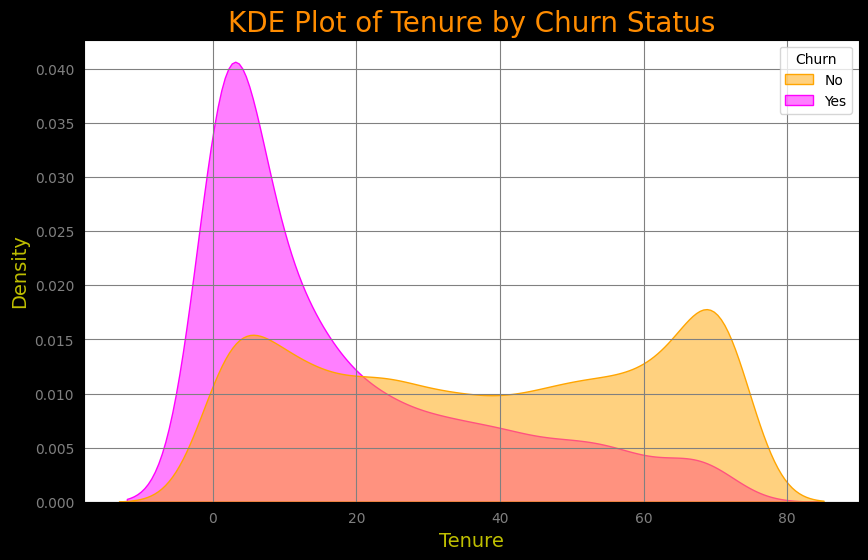

-------------------------------------------------------------------------------------------------------------------


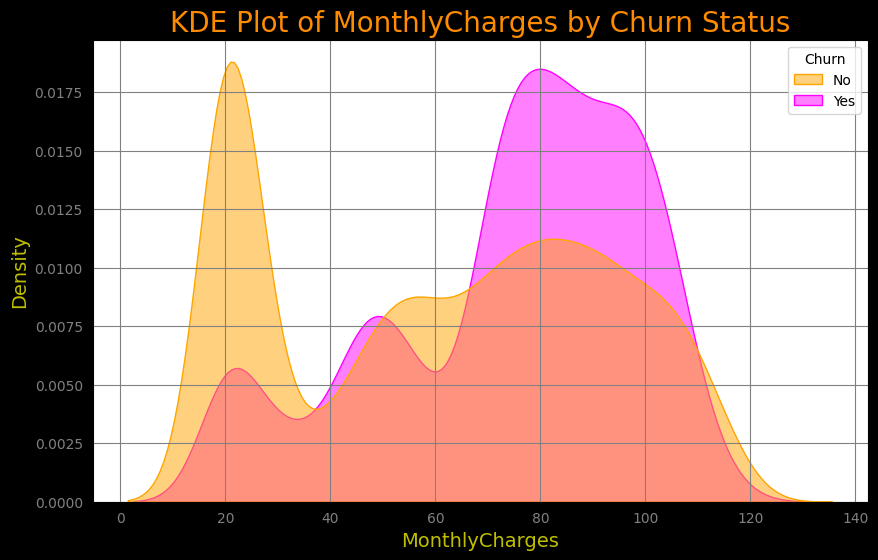

-------------------------------------------------------------------------------------------------------------------


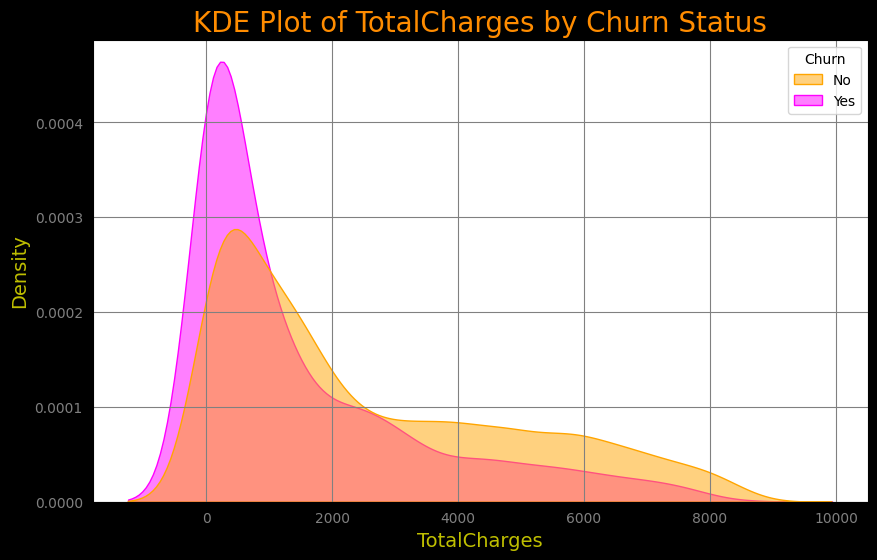

In [ ]:
for feature in features_numerical:
  print("-------------------------------------------------------------------------------------------------------------------")
  kde_plot(data, feature)


## **Exploring Numirical Data and Outliers:**

In [ ]:
def Min_Max(data, feature):
  min_value = data[feature].min()
  max_value = data[feature].max()

  print(f"Minimum {feature}: {min_value}")
  print(f"Maximum {feature}: {max_value}")

In [ ]:
for feature in features_numerical:
  Min_Max(data, feature)
  print("------------------------------")

Minimum tenure: 0
Maximum tenure: 72
------------------------------
Minimum MonthlyCharges: 18.25
Maximum MonthlyCharges: 118.75
------------------------------
Minimum TotalCharges: 18.8
Maximum TotalCharges: 8684.8
------------------------------


### **Outliers:**

In [ ]:
def Calculating_Outliers_Quantile(data, feature):
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

  print("QUANTILE TECHNIQUE: ", end = "")
  if outliers.empty:
    print("No outliers found.")
  else:
    print("Outliers found:")
    print(outliers)

In [ ]:
def Calculating_Outliers_Zscore(data, feature):
  z_scores = stats.zscore(data[feature])

  # Identifying outliers (Z-score > 3 or < -3)
  outliers = data[(z_scores > 3) | (z_scores < -3)]

  print("Z-SCORE TECHNIQUE: ", end = "")
  if outliers.empty:
    print("No outliers found.")
  else:
    print("Outliers found:")
    print(outliers)

In [ ]:
for feature in features_numerical:
  if feature == "tenure":
    print(f"{feature.capitalize()}:")
  else:
    print(f"{feature}:")

  Calculating_Outliers_Quantile(data, feature)
  Calculating_Outliers_Zscore(data, feature)
  print("---------------------------------------")

Tenure:
QUANTILE TECHNIQUE: No outliers found.
Z-SCORE TECHNIQUE: No outliers found.
---------------------------------------
MonthlyCharges:
QUANTILE TECHNIQUE: No outliers found.
Z-SCORE TECHNIQUE: No outliers found.
---------------------------------------
TotalCharges:
QUANTILE TECHNIQUE: No outliers found.
Z-SCORE TECHNIQUE: No outliers found.
---------------------------------------


## **EDA: Testing Correlation Using Data Encoding:**

In [ ]:
label_encoder = LabelEncoder()
data2 = data.copy()
data2.drop("customerID", axis=1, inplace=True)

for colm in data2.columns:
  if colm in features_numerical:
    continue
  else:
    data2[colm] = label_encoder.fit_transform(data2[colm])

Quick Comparision Between DATA and DATA2 After Encoding



In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
correlation_matrix_1 = data2.corr()

In [ ]:
correlation_matrix_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


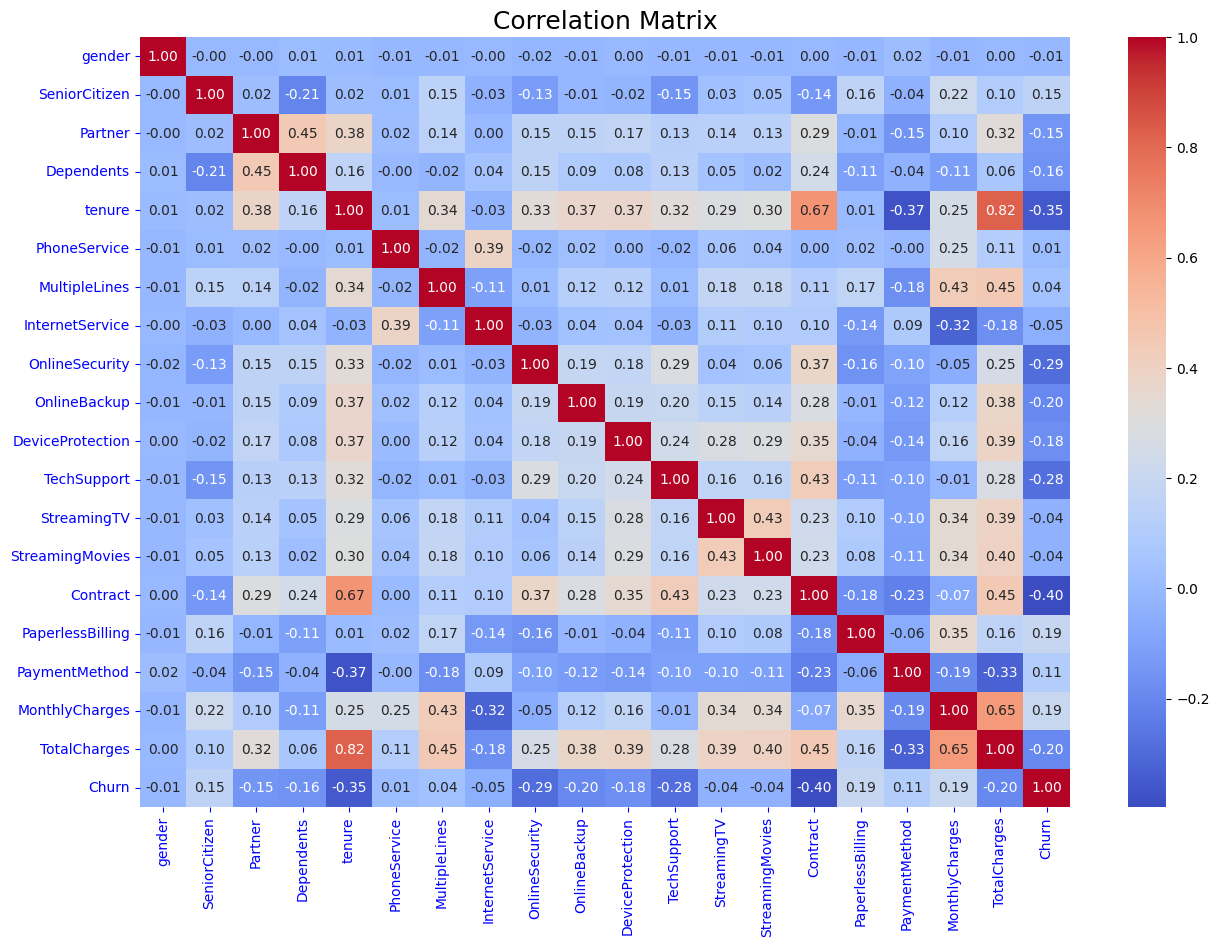

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', size = 18, color = "k")

plt.tick_params(axis='x', colors='b')
plt.tick_params(axis='y', colors='b')

plt.show()

In [ ]:
target_correlation = correlation_matrix_1[['Churn']].copy()
target_correlation.sort_values(by = 'Churn', inplace = True)
target_correlation

,Churn
Contract,-0.396713
tenure,-0.352229
OnlineSecurity,-0.289309
TechSupport,-0.282492
TotalCharges,-0.199428
OnlineBackup,-0.195525
DeviceProtection,-0.178134
Dependents,-0.164221
Partner,-0.150448
InternetService,-0.047291


# **2) Feature Engineering:**

In [ ]:
data_engineered = data.copy()

In [ ]:
data_engineered.drop("customerID", axis=1, inplace=True)

**Tenure Group:**

In [ ]:
def tenure_group(tenure):
  if tenure <= 12:
      return '0-1 year'
  elif tenure <= 24:
      return '1-2 years'
  elif tenure <= 48:
      return '2-4 years'
  elif tenure <= 60:
      return '4-5 years'
  else:
      return '5+ years'

In [ ]:
data_engineered['TenureGroup'] = data_engineered['tenure'].apply(tenure_group)

In [ ]:
data_engineered.drop('tenure', axis=1, inplace=True)

**Has Phone And Internet**

In [ ]:
data_engineered['HasPhoneAndInternet'] = np.where((data_engineered['PhoneService'] == 'Yes') & (data_engineered['InternetService'] != 'No'), 1, 0)

**Service Reliability:**

In [ ]:
conditions = [
    (data_engineered["OnlineSecurity"] == "No") &
    (data_engineered["TechSupport"] == "No") &
    (data_engineered["OnlineBackup"] == "No") &
    (data_engineered["DeviceProtection"] == "No"),  # All services are "No"

    (data_engineered["OnlineSecurity"] == "Yes") &
    (data_engineered["TechSupport"] == "Yes") &
    (data_engineered["OnlineBackup"] == "Yes") &
    (data_engineered["DeviceProtection"] == "Yes"),  # All services are "Yes"
]

labels = ["Low", "High"]

data_engineered["ServiceReliability"] = np.select(conditions, labels, default="Medium")

**Number of Services**

In [ ]:
data_engineered['NumServices'] = ((data_engineered[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes') |
                          (data_engineered['InternetService'].isin(['DSL', 'Fiber optic']))).sum(axis=1)

**Changing Values of Contract to Month**

In [ ]:
data_engineered['Contract'] = data_engineered['Contract'].replace({
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
})

In [ ]:
data_engineered

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,HasPhoneAndInternet,ServiceReliability,NumServices
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,1,Yes,Electronic check,29.85,29.85,No,0-1 year,0,Medium,1
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,12,No,Mailed check,56.95,1889.50,No,2-4 years,1,Medium,3
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,1,Yes,Mailed check,53.85,108.15,Yes,0-1 year,1,Medium,3
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,12,No,Bank transfer (automatic),42.30,1840.75,No,2-4 years,0,Medium,3
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,1,Yes,Electronic check,70.70,151.65,Yes,0-1 year,1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,...,12,Yes,Mailed check,84.80,1990.50,No,1-2 years,1,Medium,7
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,12,Yes,Credit card (automatic),103.20,7362.90,No,5+ years,1,Medium,6
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,...,1,Yes,Electronic check,29.60,346.45,No,0-1 year,0,Medium,1
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,...,1,Yes,Mailed check,74.40,306.60,Yes,0-1 year,1,Low,2


In [ ]:
new_features = ['TenureGroup', 'HasPhoneAndInternet', 'ServiceReliability', 'NumServices']

In [ ]:
for feature in new_features:
  print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
  combined_plots(data_engineered, feature)

------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------------


## **Encoding:**

**Label Encoding**

In [ ]:
data_engineered_2 = data_engineered.copy()

In [ ]:
columns = data_engineered_2.select_dtypes(include=['category','object']).columns.tolist()
# columns.append(pd.Index(['HasPhoneAndInternet']))

Compare between new list and the df's original columns

In [ ]:
columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'TenureGroup',
 'ServiceReliability']

In [ ]:
data_engineered_2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'TenureGroup', 'HasPhoneAndInternet',
       'ServiceReliability', 'NumServices'],
      dtype='object')

In [ ]:
data_engineered_2

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,HasPhoneAndInternet,ServiceReliability,NumServices
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,1,Yes,Electronic check,29.85,29.85,No,0-1 year,0,Medium,1
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,12,No,Mailed check,56.95,1889.50,No,2-4 years,1,Medium,3
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,1,Yes,Mailed check,53.85,108.15,Yes,0-1 year,1,Medium,3
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,12,No,Bank transfer (automatic),42.30,1840.75,No,2-4 years,0,Medium,3
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,1,Yes,Electronic check,70.70,151.65,Yes,0-1 year,1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,...,12,Yes,Mailed check,84.80,1990.50,No,1-2 years,1,Medium,7
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,12,Yes,Credit card (automatic),103.20,7362.90,No,5+ years,1,Medium,6
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,...,1,Yes,Electronic check,29.60,346.45,No,0-1 year,0,Medium,1
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,...,1,Yes,Mailed check,74.40,306.60,Yes,0-1 year,1,Low,2


In [ ]:
# Enconding Categorical Data:
label_encoder = LabelEncoder()
for colm in columns:
  if colm in features_numerical:
    continue
  else:
    data_engineered_2[colm] = label_encoder.fit_transform(data_engineered_2[colm])

In [ ]:
# Normalizing Numerical Data:
scaler = MinMaxScaler()
data_engineered_2[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data_engineered_2[['MonthlyCharges', 'TotalCharges']])

In [ ]:
data_engineered_2

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,HasPhoneAndInternet,ServiceReliability,NumServices
0,0,0,1,0,0,1,0,0,2,0,...,1,1,2,0.115423,0.001275,0,0,0,2,1
1,1,0,0,0,1,0,0,2,0,2,...,12,0,3,0.385075,0.215867,0,2,1,2,3
2,1,0,0,0,1,0,0,2,2,0,...,1,1,3,0.354229,0.010310,1,0,1,2,3
3,1,0,0,0,0,1,0,2,0,2,...,12,0,0,0.239303,0.210241,0,2,0,2,3
4,0,0,0,0,1,0,1,0,0,0,...,1,1,2,0.521891,0.015330,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,...,12,1,3,0.662189,0.227521,0,1,1,2,7
7039,0,0,1,1,1,2,1,0,2,2,...,12,1,1,0.845274,0.847461,0,4,1,2,6
7040,0,0,1,1,0,1,0,2,0,0,...,1,1,2,0.112935,0.037809,0,0,0,2,1
7041,1,1,1,0,1,2,1,0,0,0,...,1,1,3,0.558706,0.033210,1,0,1,1,2


In [ ]:
data_engineered

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,HasPhoneAndInternet,ServiceReliability,NumServices
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,1,Yes,Electronic check,29.85,29.85,No,0-1 year,0,Medium,1
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,12,No,Mailed check,56.95,1889.50,No,2-4 years,1,Medium,3
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,1,Yes,Mailed check,53.85,108.15,Yes,0-1 year,1,Medium,3
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,12,No,Bank transfer (automatic),42.30,1840.75,No,2-4 years,0,Medium,3
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,1,Yes,Electronic check,70.70,151.65,Yes,0-1 year,1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,...,12,Yes,Mailed check,84.80,1990.50,No,1-2 years,1,Medium,7
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,12,Yes,Credit card (automatic),103.20,7362.90,No,5+ years,1,Medium,6
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,...,1,Yes,Electronic check,29.60,346.45,No,0-1 year,0,Medium,1
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,...,1,Yes,Mailed check,74.40,306.60,Yes,0-1 year,1,Low,2


**Dummy Encoding:**

In [ ]:
columns_to_encode = [col for col in data_engineered_2.columns if col not in features_numerical]

# Perform dummy encoding on the selected columns
df_dummy_encoded = pd.get_dummies(data_engineered, columns=columns_to_encode)

In [ ]:
no_internet = ['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']

In [ ]:
for elem in no_internet:
  df_dummy_encoded.drop(elem,axis=1,inplace=True)

In [ ]:
df_dummy_encoded

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,ServiceReliability_Medium,NumServices_0,NumServices_1,NumServices_2,NumServices_3,NumServices_4,NumServices_5,NumServices_6,NumServices_7,NumServices_8
0,29.85,29.85,True,False,True,False,False,True,True,False,...,True,False,True,False,False,False,False,False,False,False
1,56.95,1889.50,False,True,True,False,True,False,True,False,...,True,False,False,False,True,False,False,False,False,False
2,53.85,108.15,False,True,True,False,True,False,True,False,...,True,False,False,False,True,False,False,False,False,False
3,42.30,1840.75,False,True,True,False,True,False,True,False,...,True,False,False,False,True,False,False,False,False,False
4,70.70,151.65,True,False,True,False,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,False,True,True,False,False,True,False,True,...,True,False,False,False,False,False,False,False,True,False
7039,103.20,7362.90,True,False,True,False,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
7040,29.60,346.45,True,False,True,False,False,True,False,True,...,True,False,True,False,False,False,False,False,False,False
7041,74.40,306.60,False,True,False,True,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# Turning Numerical To Dummy Encoding:

In [ ]:
def MonthlyCharges_group(MonthlyCharges):
  if MonthlyCharges <= 35.5:
      return 'Very_Low'
  elif MonthlyCharges <= 70.35:
      return 'Low'
  elif MonthlyCharges <= 89.85:
      return 'Medium'
  elif MonthlyCharges <= 118.75:
      return 'High'
  else:
      return 'Very_High'

In [ ]:
df_dummy_encoded['MonthlyChargesGroup'] = df_dummy_encoded['MonthlyCharges'].apply(MonthlyCharges_group)

In [ ]:
def TotalCharges_group(TotalCharges):
  if TotalCharges <= 402.0875:
      return 'Very_Low'
  elif TotalCharges <= 1400.55:
      return 'Low'
  elif TotalCharges <= 3787.9:
      return 'Medium'
  elif TotalCharges <= 8684.8:
      return 'High'
  else:
      return 'Very_High'

In [ ]:
df_dummy_encoded['TotalChargesGroup'] = df_dummy_encoded['TotalCharges'].apply(TotalCharges_group)

In [ ]:
df_dummy_encoded.drop(['MonthlyCharges','TotalCharges'],axis=1,inplace=True)

In [ ]:
df_dummy_encoded = pd.get_dummies(df_dummy_encoded, columns=['MonthlyChargesGroup', 'TotalChargesGroup'])

In [ ]:
df_dummy_encoded

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,NumServices_7,NumServices_8,MonthlyChargesGroup_High,MonthlyChargesGroup_Low,MonthlyChargesGroup_Medium,MonthlyChargesGroup_Very_Low,TotalChargesGroup_High,TotalChargesGroup_Low,TotalChargesGroup_Medium,TotalChargesGroup_Very_Low
0,True,False,True,False,False,True,True,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,False,True,True,False,True,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,False,True,True,False,True,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
3,False,True,True,False,True,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
4,True,False,True,False,True,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,True,True,False,False,True,False,True,False,True,...,True,False,False,False,True,False,False,False,True,False
7039,True,False,True,False,False,True,False,True,False,True,...,False,False,True,False,False,False,True,False,False,False
7040,True,False,True,False,False,True,False,True,True,False,...,False,False,False,False,False,True,False,False,False,True
7041,False,True,False,True,False,True,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True


# **3) Customer Segmentation:**

In [ ]:
# Separating features (X) and target (y)
X = data_engineered_2.drop(['Churn'], axis=1)  # Drop the target column
y = data_engineered_2['Churn']  # Target column

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = dt.predict(X_test)

# Adding segmentation labels to the original dataset
data_engineered_2['Segment'] = dt.predict(X)

# # Plotting the tree for visualization (REMOVED IT)
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 10))
# plot_tree(dt, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True)
# plt.title("Decision Tree for Customer Segmentation")
# plt.show()

# Analyzing the segments
segment_analysis = data_engineered_2.groupby('Segment').mean()
print(segment_analysis)


           gender  SeniorCitizen   Partner  Dependents  PhoneService  \
Segment                                                                
0        0.509144       0.148432  0.515839    0.325604      0.888635   
1        0.475517       0.253536  0.264418    0.126224      1.000000   

         MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
Segment                                                                 
0             0.951012         0.853854        0.881777      0.980732   
1             0.870511         1.000000        0.178455      0.411317   

         DeviceProtection  ...  Contract  PaperlessBilling  PaymentMethod  \
Segment                    ...                                              
0                0.972567  ...  9.980405          0.563194       1.535761   
1                0.450490  ...  1.208923          0.785637       1.831338   

         MonthlyCharges  TotalCharges     Churn  TenureGroup  \
Segment                                      

In [ ]:
# Separating features (X) and target (y)
X = df_dummy_encoded.drop(['Churn_No', 'Churn_Yes'], axis=1)  # Drop the target column
y = df_dummy_encoded['Churn_Yes']  # Target column

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = dt.predict(X_test)

# Adding segmentation labels to the original dataset
df_dummy_encoded['Segment'] = dt.predict(X)

# # Plotting the tree for visualization (REMOVED IT)
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 10))
# plot_tree(dt, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True)
# plt.title("Decision Tree for Customer Segmentation")
# plt.show()

# Analyzing the segments
segment_analysis = df_dummy_encoded.groupby('Segment').mean()
print(segment_analysis)


         gender_Female  gender_Male  SeniorCitizen_0  SeniorCitizen_1  \
Segment                                                                 
False         0.491806     0.508194         0.850632         0.149368   
True          0.512236     0.487764         0.774684         0.225316   

         Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
Segment                                                           
False      0.466541     0.533459       0.665586        0.334414   
True       0.766245     0.233755       0.872574        0.127426   

         PhoneService_No  PhoneService_Yes  ...  NumServices_7  NumServices_8  \
Segment                                     ...                                 
False           0.101741          0.898259  ...       0.066746       0.035507   
True            0.072574          0.927426  ...       0.003376       0.000000   

         MonthlyChargesGroup_High  MonthlyChargesGroup_Low  \
Segment                                            

The segmentations have similarities but we will focus on the FIRST one

## **Key Analysis:**
### **Segment 0:**
- Lower churn (Churn = 0.183): Customers in this segment are less likely to churn.
- Longer contracts (Contract = 10.299): These customers typically have longer contracts, possibly annual or multi-year.
- Higher service reliability (ServiceReliability = 1.744): Indicates better perceived reliability of the services.
- Higher tenure (TenureGroup = 2.067): They have been customers for a longer time on average.

### **Segment 1:**
- Higher churn (Churn = 0.694): Customers in this segment are more likely to churn.
- Shorter contracts (Contract = 1.170): These customers are likely on month-to-month plans.
- Lower tenure (TenureGroup = 0.1): They are newer customers compared to Segment 0.
- Higher monthly charges (MonthlyCharges = 75.68): They pay more on average each month.

# **4) Churn Prediction Modeling:**

In [ ]:
# Data From LabelEncoder

In [ ]:
X

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,NumServices_7,NumServices_8,MonthlyChargesGroup_High,MonthlyChargesGroup_Low,MonthlyChargesGroup_Medium,MonthlyChargesGroup_Very_Low,TotalChargesGroup_High,TotalChargesGroup_Low,TotalChargesGroup_Medium,TotalChargesGroup_Very_Low
0,True,False,True,False,False,True,True,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,False,True,True,False,True,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,False,True,True,False,True,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
3,False,True,True,False,True,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
4,True,False,True,False,True,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,True,True,False,False,True,False,True,False,True,...,True,False,False,False,True,False,False,False,True,False
7039,True,False,True,False,False,True,False,True,False,True,...,False,False,True,False,False,False,True,False,False,False
7040,True,False,True,False,False,True,False,True,True,False,...,False,False,False,False,False,True,False,False,False,True
7041,False,True,False,True,False,True,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
y

,Churn_Yes
0,False
1,False
2,True
3,False
4,True
...,...
7038,False
7039,False
7040,False
7041,True


In [ ]:
# Spltting data to train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                   random_state=42, shuffle = True, stratify = y)

In [ ]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=42, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(random_state=42, class_weight='balanced'),
    'CatBoost': CatBoostClassifier(logging_level='Silent'),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'NaiveBayes': GaussianNB()
}
# Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")
    print()

Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.7819

Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.7771

Cross-validating LGBM...
Mean accuracy for LGBM: 0.7941

Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.7254

Cross-validating KNN...
Mean accuracy for KNN: 0.7606

Cross-validating SVC...
Mean accuracy for SVC: 0.7520

Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.7524

Cross-validating CatBoost...
Mean accuracy for CatBoost: 0.7929

Cross-validating GradientBoosting...
Mean accuracy for GradientBoosting: 0.8012

Cross-validating AdaBoost...
Mean accuracy for AdaBoost: 0.8046

Cross-validating NaiveBayes...
Mean accuracy for NaiveBayes: 0.7304



Curing imbalnce in Churn Classes by generating synthetic data similar to original data!!

In [ ]:
X = X.astype(float)
smoten = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoten.fit_resample(X, y)

In [ ]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled,
                                                                           test_size=0.20,random_state=42, shuffle =True,stratify=y_resampled)

In [ ]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=42, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(random_state=42, class_weight='balanced'),
    'CatBoost': CatBoostClassifier(logging_level='Silent'),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'NaiveBayes': GaussianNB()
}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")
    print()

Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.9626

Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.9622

Cross-validating LGBM...
Mean accuracy for LGBM: 0.9588

Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.9398

Cross-validating KNN...
Mean accuracy for KNN: 0.9385

Cross-validating SVC...
Mean accuracy for SVC: 0.9478

Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.9240

Cross-validating CatBoost...
Mean accuracy for CatBoost: 0.9618

Cross-validating GradientBoosting...
Mean accuracy for GradientBoosting: 0.9501

Cross-validating AdaBoost...
Mean accuracy for AdaBoost: 0.9424

Cross-validating NaiveBayes...
Mean accuracy for NaiveBayes: 0.8951



In [ ]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
0,RandomForest,0.962603
1,XGBoost,0.962208
7,CatBoost,0.961812
2,LGBM,0.958845
8,GradientBoosting,0.950138
5,SVC,0.947763
9,AdaBoost,0.942420
3,DecisionTree,0.939846
4,KNN,0.938465
6,LogisticRegression,0.924020


In [ ]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=42, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(random_state=42, class_weight='balanced'),
    # 'CatBoost': CatBoostClassifier(logging_level='Silent'),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'NaiveBayes': GaussianNB()
}
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'max_depth': [3, 5, 7, 10, 20, 30, 40],
        'n_estimators': [50, 100, 200],
        'subsample': [0.6, 0.8, 1],
        'learning_rate': [0.05, 0.1, 0.5,1]
    },
    'LGBM': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20, 30, 40],
        'learning_rate': [0.05, 0.1, 0.5,1]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    # 'CatBoost': {
    #     'iterations': [100, 200],
    #     'learning_rate': [0.05, 0.1,.5,1],
    #     'depth': [6, 10, 15, 20, 25, 30, 40]
    # },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1,.5,1],
        'max_depth': [None, 10, 20, 30, 40]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1,.5,1]
    },
    'NaiveBayes': {}
}

best_results = []
for model_name, model in models.items():
    print(f"\nPerforming GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
    print(f"\nBest parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score for {model_name}: {best_score:.4f}")


Performing GridSearchCV for RandomForest...

Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score for RandomForest: 0.9644

Performing GridSearchCV for XGBoost...

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score for XGBoost: 0.9638

Performing GridSearchCV for LGBM...

Best parameters for LGBM: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best cross-validation score for LGBM: 0.9644

Performing GridSearchCV for DecisionTree...

Best parameters for DecisionTree: {'max_depth': 10, 'min_samples_split': 5}
Best cross-validation score for DecisionTree: 0.9410

Performing GridSearchCV for KNN...

Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score for KNN: 0.9539

Performing GridSearchCV for SVC...

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cr

In [ ]:
# Best Model:

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
knn_model.fit(X_train_resampled, y_train_resampled)
y_pred = knn_model.predict(X_test_resampled)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test_resampled, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_resampled, y_pred))

# Classification Report
print('Classification Report:')
print(classification_report(y_test_resampled, y_pred))


Accuracy: 96.99%
Confusion Matrix:
[[509  35]
 [  3 717]]
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.94      0.96       544
        True       0.95      1.00      0.97       720

    accuracy                           0.97      1264
   macro avg       0.97      0.97      0.97      1264
weighted avg       0.97      0.97      0.97      1264



Confusion Matrix is : 
 [[509  35]
 [  3 717]]


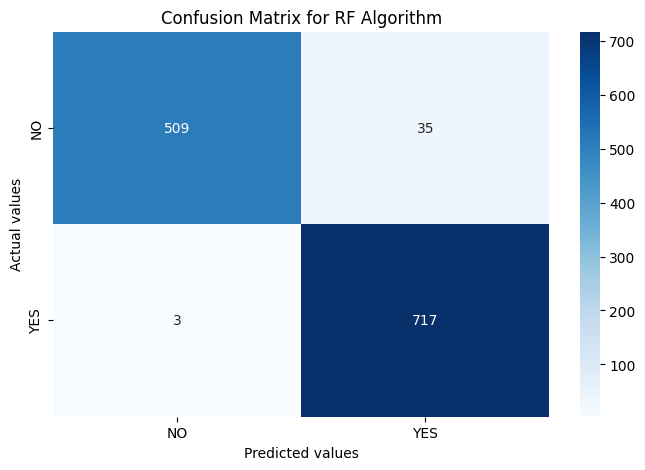

In [ ]:
CM = confusion_matrix(y_test_resampled, y_pred)
print('Confusion Matrix is : \n', CM)
plt.figure(figsize=(8,5))
sns.heatmap(data=CM, annot=True,fmt='g', cmap="Blues", xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title(f'Confusion Matrix for RF Algorithm')
plt.show()

# **5) Churn Analysis:** + **6) Develop Churn Reduction Strategies:**

## **Strategies Based On Vizualizations:**


### **1.   Senior Citizens:**
- **Targeted Retention Plans:** Offer senior citizens customized retention plans, such as discounts on longer-term contracts or additional services (e.g., tech support or home assistance) that would appeal to their needs.
- **Personalized Communication:** Use more personalized communication, such as monthly check-ins or dedicated customer service agents, to help seniors feel valued and reduce churn.
- **Senior-Friendly Support:** Implement senior-friendly support features like easy-to-understand manuals, one-on-one phone support, or live chat to reduce friction in using the service.

### **2.   Customers Without Partners or Dependents**
- **Offer Personal Engagement:** Single customers may feel less engaged with the brand. Assign personalized customer success representatives or provide access to exclusive events or content that fosters a sense of belonging.
- **Loyalty Programs:** Develop a loyalty program that gives customers without partners a reason to stay, offering rewards for long-term commitments or referrals to friends and family.
- **Flexible Plans:** Provide customers without dependents with flexible plans that allow them to change their services easily without a penalty, such as adjusting internet speeds, or adding services like gaming or home automation.

### **3. Customers Without Online Security, Backup, or Tech Support: (engineered feature)**
- **Incentivize Security Features:** Provide special offers for free trials or discounted rates on online security, backup, or tech support services to customers who currently don't have them.
- **Upsell Additional Services:** Offer an upsell campaign targeting customers without these services, highlighting the risk of not using these features (e.g., data loss, security risks) and emphasizing their importance.

### **4. Customers With Month-to-Month Contracts:**
- **Offer Loyalty-Based Discounts:** Offer discounted rates for customers who switch from a month-to-month plan to a longer-term contract (e.g., one-year or two-year plans), ensuring they feel like they're getting more value.
- **Contract Flexibility:** Offer flexible contract terms that allow customers to upgrade or downgrade services without penalties, ensuring they don't feel trapped in long-term agreements.

### **5. Customers With Paperless Billing:**
- **Incentives to Stay on Paperless Billing:** Encourage customers with paperless billing to stay by offering exclusive discounts or loyalty points if they remain on paperless billing.
- **Improved Billing Experience:** Enhance the digital experience by making billing statements easier to access, with clear notifications of upcoming charges and easy payment options to reduce any frustration.

### **6. Customers Paying With Electronic Checks:**
- **Encourage Credit Card or Bank Transfers:** Offer a discount or incentives for customers who switch from electronic checks to more stable payment methods, such as credit cards or bank transfers.
- **Payment Reminders:** Send reminders and offers to encourage timely payments or promote alternative payment methods, emphasizing ease and security.

### **7. Customers with Fiber Internet Service:**
- **Service Quality Optimization:** Ensure that fiber customers are experiencing optimal speeds and performance. Proactively address any network issues and offer priority technical support for faster resolution.
- **Customer Feedback Surveys:** Regularly survey fiber customers for feedback on their experience, addressing any pain points immediately to prevent churn.
- **Tiered Pricing Options:** Introduce more affordable pricing tiers for fiber internet with essential features, ensuring customers who are price-sensitive still have access to fiber services.

## **Strategy 7:**
### **Survey Link:** https://forms.gle/TwnWGSWKF51oB2bM9
### **Tiered List**
####**1. Basic Tier: "Essential Fiber"**

  **Speed:** Moderate (e.g., 100 Mbps)
  
  **Price:** Entry-level pricing, ideal for price-sensitive customers.

####**2. Standard Tier: "Everyday Fiber" (Current Offering)**

**Speed:** High (e.g., 500 Mbps)

**Price:** Standard pricing.

####**3. Premium Tier: "Elite Fiber"**

**Speed:** Ultra-high (e.g., 1 Gbps)

**Price:** Premium pricing.

## **Strategies Based On Customer Segmentation (Step 3):**

- **Contract Incentives:** To reduce churn, offer incentives to move from month-to-month plans to annual or multi-year contracts (e.g., discounts or additional services) that provide more stability and value.
- **Personalized Retention Campaigns:** These customers are newer and likely need more personalized outreach. Implement targeted campaigns that highlight the benefits of staying with the company, such as service reliability or rewards for long-term loyalty.
- **Monthly Charges Adjustment:** Since these customers are paying higher monthly charges, consider offering them more flexible payment options or introducing lower-cost service tiers to fit their needs while keeping them engaged.
- **Value-Based Communication:** Highlight value-driven communication that showcases the benefits of the services they're already paying for. Show how staying with the company offers better long-term value than switching to competitors.
- **Increased Engagement:** For customers with lower tenure, engage them earlier in the customer lifecycle with educational content, usage tips, and frequent check-ins to ensure they're happy with their services.

# **Summary of Churn Reduction Strategies:**
- **Targeted incentives** for seniors, single customers, and those without dependents.Bundling services (e.g., phone and internet) to improve perceived value.
- **Upsell and cross-sell** internet services and tech-related add-ons.
- **Loyalty programs** for month-to-month customers and paperless billing customers.
- **Discounts and tiered plans** to address pricing concerns, especially for high-risk customers paying higher monthly charges.
- **Customer education and personalized engagement** to mitigate churn among those who have been identified as at risk based on service usage and satisfaction levels.